### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

### Read Data

In [2]:
df_train = pd.read_csv('../input/customer-propensity-to-purchase-data/training_sample.csv')
df_test = pd.read_csv('../input/customer-propensity-to-purchase-data/testing_sample.csv')

#Merge both Dataframes
df = pd.concat([df_train, df_test])

### Explore Data

In [3]:
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607056 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   607056 non-null  object
 1   basket_icon_click        607056 non-null  int64 
 2   basket_add_list          607056 non-null  int64 
 3   basket_add_detail        607056 non-null  int64 
 4   sort_by                  607056 non-null  int64 
 5   image_picker             607056 non-null  int64 
 6   account_page_click       607056 non-null  int64 
 7   promo_banner_click       607056 non-null  int64 
 8   detail_wishlist_add      607056 non-null  int64 
 9   list_size_dropdown       607056 non-null  int64 
 10  closed_minibasket_click  607056 non-null  int64 
 11  checked_delivery_detail  607056 non-null  int64 
 12  checked_returns_detail   607056 non-null  int64 
 13  sign_in                  607056 non-null  int64 
 14  saw_checkout        

In [5]:
df.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [6]:
df['ordered'].value_counts()

0    587963
1     19093
Name: ordered, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


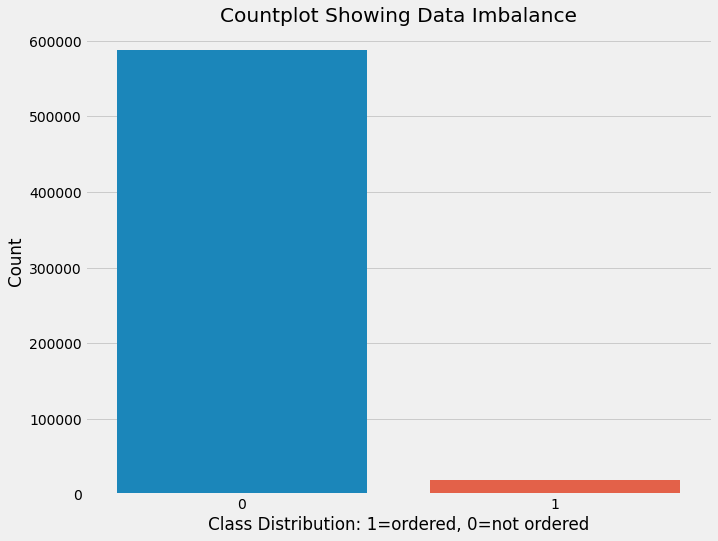

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 8))
sns.countplot(df['ordered'])
plt.xlabel('Class Distribution: 1=ordered, 0=not ordered')
plt.ylabel("Count")
plt.title('Countplot Showing Data Imbalance')
plt.show()
plt.savefig('imbalance.png')

In [8]:
list(df.columns)

['UserID',
 'basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'account_page_click',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'closed_minibasket_click',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_sizecharts',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk',
 'ordered']

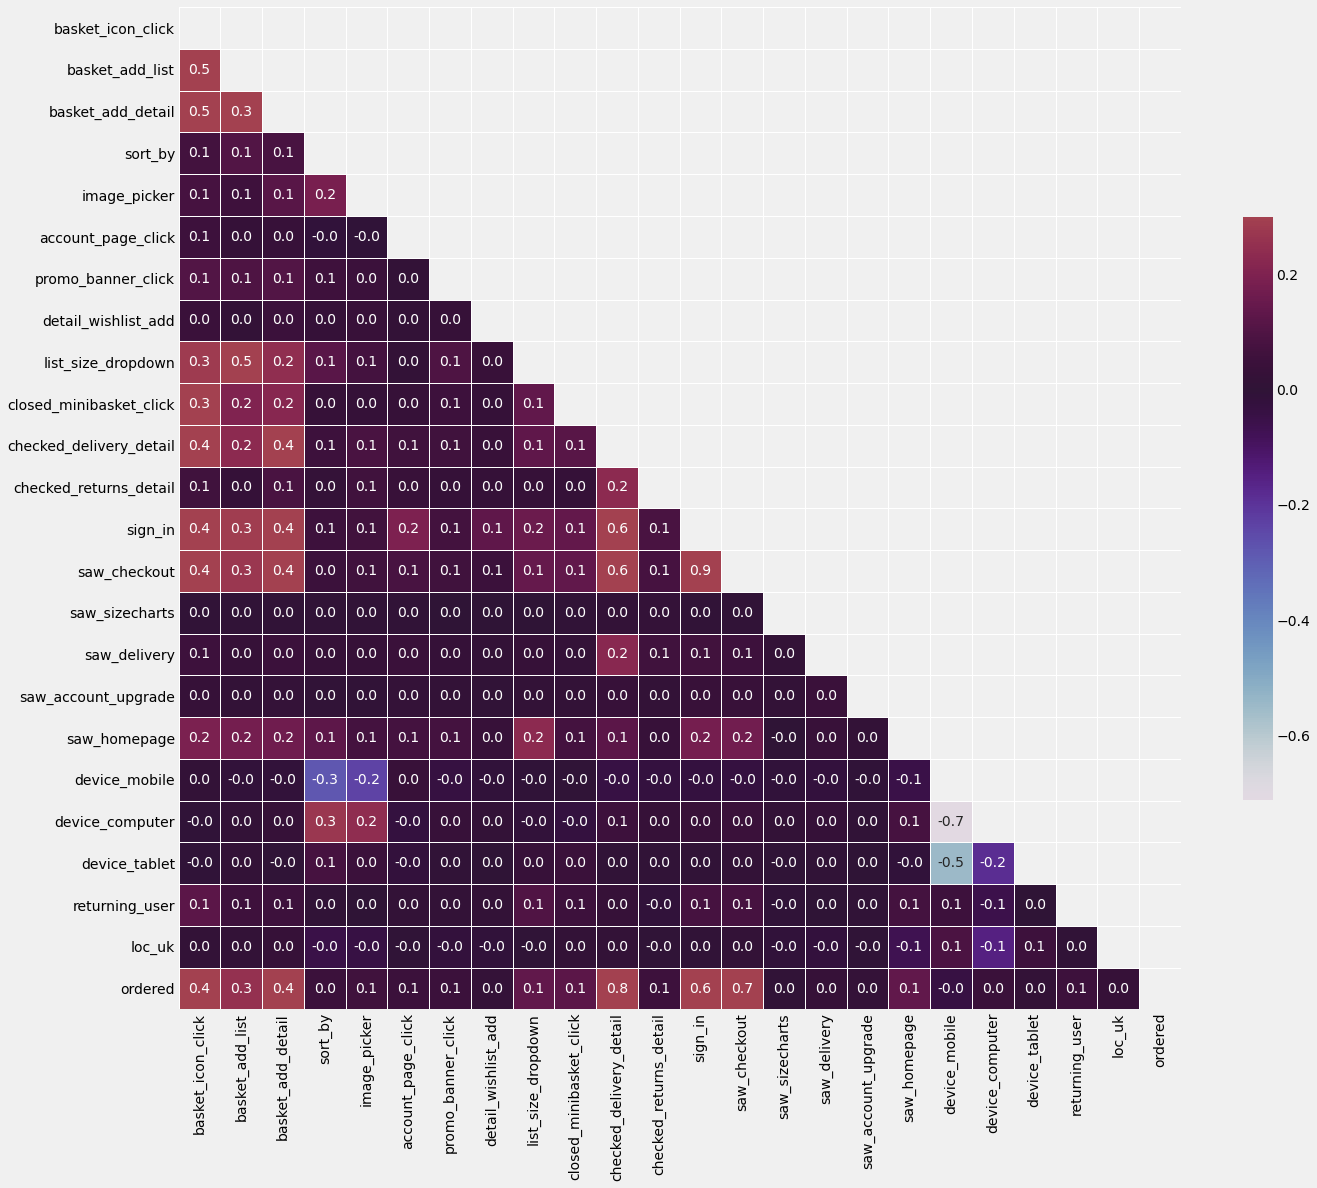

In [9]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr.png')

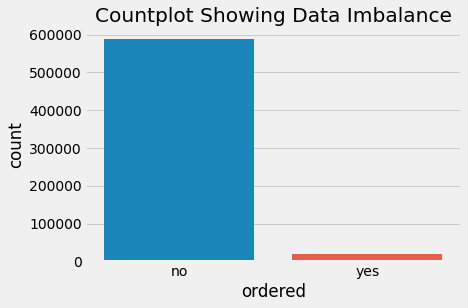

In [10]:
df1 = df.copy()
df1['ordered'].replace({1 :'yes', 0: 'no'}, inplace=True)
df1['ordered'].value_counts(normalize=True)
sns.countplot(x='ordered', data=df1)
plt.title('Countplot Showing Data Imbalance')
plt.show()

##### sign_in and saw_checkout have a correlation of 0.9, hence they have almost the same effect on the dependent variable. We will drop sign_in

##### We'll also drop other irrelevant columns

##### Now, let's take a closer look at the correlation between 'ordered' and the rest of the features

In [11]:
corr['ordered']

basket_icon_click          0.383696
basket_add_list            0.255553
basket_add_detail          0.370965
sort_by                    0.047227
image_picker               0.062375
account_page_click         0.050382
promo_banner_click         0.050202
detail_wishlist_add        0.020950
list_size_dropdown         0.135693
closed_minibasket_click    0.125442
checked_delivery_detail    0.753749
checked_returns_detail     0.051814
sign_in                    0.608471
saw_checkout               0.653194
saw_sizecharts             0.006920
saw_delivery               0.027649
saw_account_upgrade        0.022670
saw_homepage               0.136508
device_mobile             -0.037038
device_computer            0.041525
device_tablet              0.015821
returning_user             0.052439
loc_uk                     0.027906
ordered                    1.000000
Name: ordered, dtype: float64

### Split Data into train and test sets

In [12]:
X = df.drop(['UserID', 'device_mobile', 'ordered', 'sign_in', ], axis=1)
y = df['ordered'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 411557, 1: 13382})
Testing target statistics: Counter({0: 176406, 1: 5711})


### Apply Random OverSampling for class Imbalance

In [14]:
# oversample the smallest class of the train set
over_sampler = RandomOverSampler(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 411557, 1: 411557})
Testing target statistics: Counter({0: 176406, 1: 5711})


### Modelling

#### Random Forest Classifier

test accuracy:
0.9859705573889312
train accuracy:
0.9902771669537876
              precision    recall  f1-score        support
0              0.999850  0.985664  0.992706  176406.000000
1              0.692111  0.995447  0.816517    5711.000000
accuracy       0.985971  0.985971  0.985971       0.985971
macro avg      0.845981  0.990556  0.904612  182117.000000
weighted avg   0.990200  0.985971  0.987181  182117.000000


Predicted,0,1,All
Actual,,,
0,173877,2529,176406
1,26,5685,5711
All,173903,8214,182117


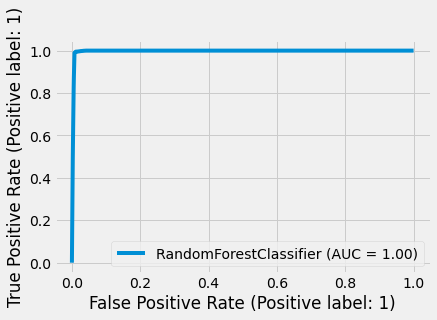

In [15]:
rf = RandomForestClassifier(max_features='auto',n_estimators=20, max_depth=5, min_samples_leaf=100) 
#rf = RandomForestClassifier(n_estimators=78,random_state=9, n_jobs=27,max_features= 'auto')



rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Test score
score_rf = rf.score(X_test, y_test)
print('test accuracy:')
print(score_rf)
print('train accuracy:')
print(rf.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(rf, X_test, y_test)

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

#### Logistic Regression

test accuracy:
0.9920380854066342
train accuracy:
0.9914544036427518
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    176406
           1       0.80      0.99      0.89      5711

    accuracy                           0.99    182117
   macro avg       0.90      0.99      0.94    182117
weighted avg       0.99      0.99      0.99    182117



Predicted,0,1,All
Actual,,,
0,175012,1394,176406
1,56,5655,5711
All,175068,7049,182117


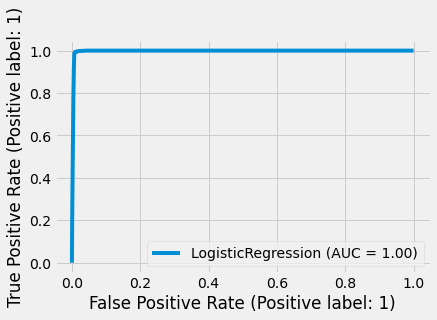

In [16]:
logistic = LogisticRegression(max_iter=150, penalty='l2', C=1.0)
#logistic = LogisticRegression()

logistic.fit(X_train, y_train)

prediction_lr = logistic.predict(X_test)

# Test score
score_logistic = logistic.score(X_test, y_test)
print('test accuracy:')
print(score_logistic)
print('train accuracy:')
print(logistic.score(X_train, y_train))

print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, X_test, y_test)

confusion_matrix(y_test, prediction_lr)
pd.crosstab(y_test, prediction_lr, rownames = ['Actual'], colnames =['Predicted'], margins = True)

#### Naive Bayes Classifier

test accuracy:
0.9885238610343899
train accuracy:
0.9903184735042777
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176406
           1       0.73      0.99      0.84      5711

    accuracy                           0.99    182117
   macro avg       0.87      0.99      0.92    182117
weighted avg       0.99      0.99      0.99    182117



Predicted,0,1,All
Actual,,,
0,174360,2046,176406
1,44,5667,5711
All,174404,7713,182117


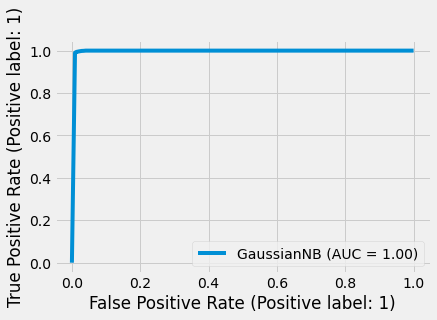

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)



prediction_gnb = gnb.predict(X_test)

# Test score
score_gnb = gnb.score(X_test, y_test)
print('test accuracy:')
print(score_gnb)
print('train accuracy:')
print(gnb.score(X_train, y_train))

print(classification_report(y_test,prediction_gnb))
metrics.plot_roc_curve(gnb, X_test, y_test)

confusion_matrix(y_test, prediction_gnb)
pd.crosstab(y_test, prediction_gnb, rownames = ['Actual'], colnames =['Predicted'], margins = True)

### Accuracy plots

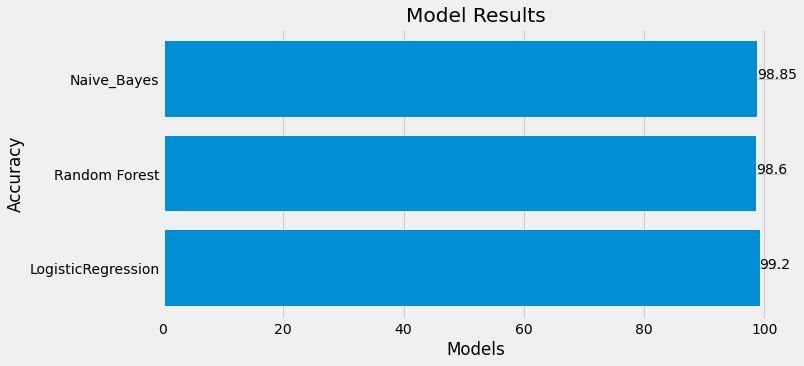

In [18]:
results = [round(score_logistic*100, 2), round(score_rf*100, 2), round(score_N*100, 2)]
names = ['LogisticRegression', 'Random Forest','Naive_Bayes']
plt.figure(figsize=(10, 5))
plt.barh(names,results)

for index, value in enumerate(results):
    plt.text(value, index, str(value))
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Model Results')
plt.show()

### Feature Importance Plot for the Logistic Regression Model

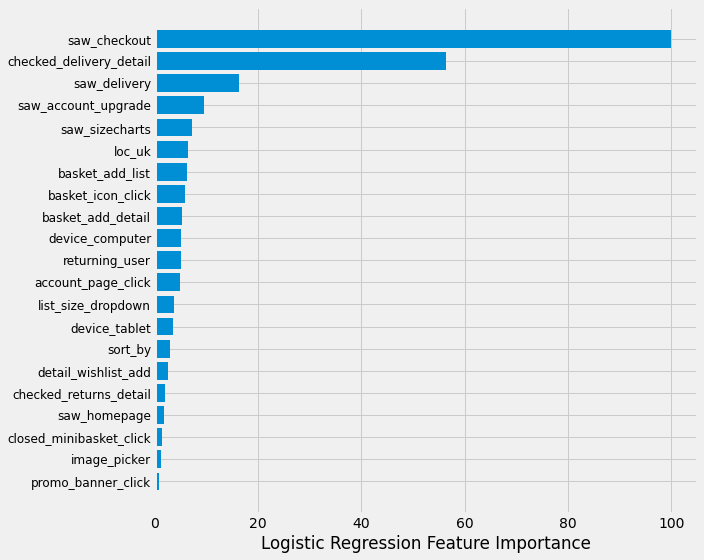

In [36]:
feature_importance = abs(logistic.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Logistic Regression Feature Importance')

plt.tight_layout()   
plt.show()

### Model Explainability with Anchors on the Logistic Regression Model

In [22]:
pip install alibi

Note: you may need to restart the kernel to use updated packages.


In [23]:
from alibi.explainers import AnchorTabular

#### Define Predict Function

In [24]:
predict_fn = lambda x: logistic.predict_proba(x)

#### Initialize and fit anchor explainer for tabular data

In [25]:
feature_names = X.columns
explainer = AnchorTabular(predict_fn, feature_names)

#### Discretize the ordinal features into quartiles

In [26]:
explainer.fit(X_train.values, disc_perc=(25, 50, 75))

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'disc_perc': (25, 50, 75), 'seed': None}}
)

#### Getting an anchor

##### Below, we get an anchor for the prediction of the first observation in the test set. An anchor is a sufficient condition - that is, when the anchor holds, the prediction should be the same as the prediction for this instance.

In [27]:
class_names = ['not ordered', 'ordered']
idx = 0
print('Prediction: ', class_names[explainer.predictor(X_test.values[idx].reshape(1, -1))[0]])

Prediction:  not ordered


##### We set the precision threshold to 0.95. This means that predictions on observations where the anchor holds will be the same as the prediction on the explained instance at least 95% of the time.

In [28]:
explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: saw_checkout <= 0.00 AND checked_returns_detail <= 0.00
Precision: 1.00
Coverage: 0.48


In [32]:
class_names = ['not ordered', 'ordered']
idx = 0
print('Prediction: ', class_names[explainer.predictor(X_test.values[idx].reshape(1, -1))[0]])


explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  not ordered
Anchor: saw_checkout <= 0.00 AND saw_account_upgrade <= 0.00
Precision: 1.00
Coverage: 0.48


In [29]:
class_names = ['not ordered', 'ordered']
idx = 1
print('Prediction: ', class_names[explainer.predictor(X_test.values[idx].reshape(1, -1))[0]])


explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  not ordered
Anchor: saw_checkout <= 0.00 AND checked_returns_detail <= 0.00
Precision: 1.00
Coverage: 0.48


In [31]:
class_names = ['not ordered', 'ordered']
idx = 43
print('Prediction: ', class_names[explainer.predictor(X_test.values[idx].reshape(1, -1))[0]])


explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  ordered
Anchor: checked_delivery_detail > 0.00 AND saw_checkout > 0.00
Precision: 1.00
Coverage: 0.50


In [33]:
class_names = ['not ordered', 'ordered']
idx = 40
print('Prediction: ', class_names[explainer.predictor(X_test.values[idx].reshape(1, -1))[0]])


explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  ordered
Anchor: checked_delivery_detail > 0.00 AND saw_checkout > 0.00
Precision: 1.00
Coverage: 0.50
